<div align="right">Python 2.7 Jupyter Notebook</div>

# Introduction to NetworkX

<div class="alert alert-warning">
<b>This notebook should be opened and completed by students completing both the technical and non-technical tracks of this course.</b><br>As a reminder, from notebook 2 onwards there will be different versions for the non-technical and technical tracks. Students should open and complete the relevant notebooks based on their choice of technical or non-technical tracks. To avoid any confusion:

<br><br><b>Non-technical track notebooks [Unit 3]</b>: 
<li>M4_NB2_PeerNetworkAnalysis_Non_Technical
<li>M4_NB3_NetworkClustering_Non_Technical

<br><br><b>Technical track notebooks [Unit 4]</b>:
<li>M4_NB2_PeerNetworkAnalysis_Technical
<li>M4_NB3_NetworkClustering_Technical
<li>M4_NB4_GraphSignalProcessing_Technical

</div>

### Your completion of the Notebook exercises will be graded based on your ability to: 

> **Understand**: Does your pseudo-code and/or comments show evidence that you recall and understand technical concepts?

> **Apply**: Are you able to execute code, using the supplied examples, that perform the required functionality on supplied or generated data sets? 

> **Analyze**: Are you able to pick the relevant method, library or resolve specific stated questions?

# Notebook introduction

This week, the practical assessments will focus on the study of networks. In this notebook you will start with an introduction to NetworkX.

[NetworkX](https://networkx.github.io/)  is a Python language software package used to create, manipulate, and study the structure, dynamics, and function of complex networks. The first version was designed and written by Aric Hagberg, Dan Schult, and Pieter Swart between 2002 and 2003.

With NetworkX you can load and store networks in standard and nonstandard data formats; generate numerous types of random and classic networks; analyze network structure; build network models; design new network algorithms; draw networks; and much more.

To access and use NetworkX module functionality, it first needs to be imported into your Jupyter notebook workspace. In addition to this, you will also import Matplotlib - a plotting and data visualization module that will be used for the graphical representation of the graph objects created using NetworkX.

Here are some additional links that will provide you with solid foundational knowledge of NetworkX:

- [NetworkX documentation](http://networkx.readthedocs.io/en/networkx-1.11/)
- [NetworkX quick example](https://networkx.github.io/examples.html)
- [NetworkX examples](http://networkx.readthedocs.io/en/networkx-1.11/examples/)
- [NetworkX tutorial](http://networkx.readthedocs.io/en/networkx-1.11/tutorial/)


> **Note**: 

> It is strongly recommended that you save a checkpoint after applying significant changes or completing exercises. This allows you to return the notebook to a previous state should you wish to do so. On the Jupyter menu, select "File", then "Save and Checkpoint" from the dropdown menu that appears.

#### Load libraries and set options

In [2]:
# Load relevant libraries.
import networkx as nx          # Graph-like object representation and manipulation module.
import matplotlib.pylab as plt
%matplotlib inline

In many cases you may be dependent on a specific version of python libraries.
Executing the cell below will provide you with details about the version of NetworkX installed in your workspace.

In [3]:
if(float(nx.__version__) < 1.11):
    print 'WARNING. Expecting NetworkX version {0} or higher but found {1}'.format(1.11, nx.__version__)
else:
    print 'CONGRATULATIONS! You have the expected version of NetworkX.'

CONGRATULATIONS! You have the expected version of NetworkX.


# 1. Graph creation
With NetworkX, graph objects can be created in one of three ways:

1. Adding edges and nodes explicitly;

2. Importing data from data sources; and

3. Graph generators.

This notebook predominantly investigates graph exploration using the first approach, with a few remarks made on the other graph creation approaches.

## 1.1 Adding edges and nodes explicitly
First, create a graph object by explicitly adding nodes to said object.

In [4]:
# Instantiate an empty, undirected graph object.
G=nx.Graph()

# Add a node.
G.add_node(1)

# Add another node.
G.add_node('x')

Visualize the graph structure.

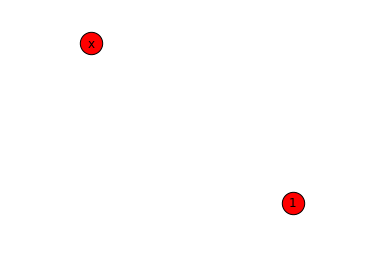

In [5]:
# Plot the graph structure.
plt.axis('off')
nx.draw(G,pos=nx.spring_layout(G), with_labels=True, node_size=500)

Alternatively, you can start off from an edge pair or a list of edge pairs. Such a pairing may or may not include the strength, or other attributes, that describes the relationship between the pair(s). The special edge attribute "weight" should always be numeric and holds values used by algorithms requiring weighted edges. When specifying edges as tuples, the optional third argument refers to the weight.

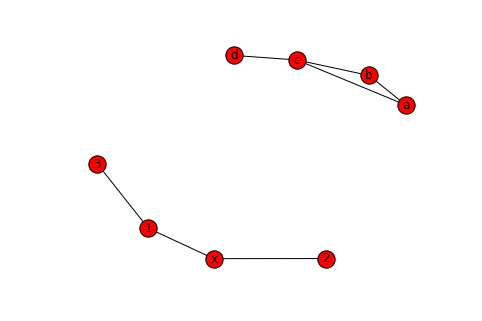

In [6]:
# Demonstrate a second method of creating a graph.
G.add_edge(1,3)

# Add another edge with a weight.
G.add_edge(2,'x',weight=0.9)
G.add_edge(1,'x',weight=3.142)

# Add edges from a list of tuples.
edgelist=[('a','b',5.0),('b','c',3.0),('a','c',1.0),('c','d',7.3)] 
G.add_weighted_edges_from(edgelist)

# Visualize the graph structure.
nx.draw(G, with_labels=True)

A node can be any of the so-called **hashable** objects - strings, numbers, files, functions, etc.  In the following two examples, a node that is a math function and a node that is a file object are added.

In [7]:
# Add a sine function as node, which is imported from the math module.
from math import sin
G.add_node(sin) 

In [8]:
# Add file handle object as node.
fh = open("../data/CallLog.csv","r") # handle to file object
G.add_node(fh)

You can examine the nodes and edges in your graph using various commands. Execute the cells below to see the resulting output.

In [9]:
# List the nodes in your graph object.
G.nodes()

['a',
 1,
 2,
 3,
 'd',
 <open file '../data/CallLog.csv', mode 'r' at 0x7f77888d6810>,
 'c',
 'b',
 'x',
 <function math.sin>]

In [10]:
# How many nodes are contained within your graph model?
G.number_of_nodes()

10

In [11]:
# Alternative syntax for nodes.
G.order()

10

In [12]:
# List the edges.
G.edges()

[('a', 'c'), ('a', 'b'), (1, 'x'), (1, 3), (2, 'x'), ('d', 'c'), ('c', 'b')]

In [13]:
# How many edges do you have? 
G.size()

7

In [14]:
# Alternative syntax for edges.
G.number_of_edges()

7

#### 1.1.1 Getting edge weight information
The most direct way to get edge weight data is using the "get_edge_data" method, which returns the attribute dictionary associated with an edge pairing. The following example uses a python "trick" called unpacking, in which an edge pairing tuple is used as the argument to the function call, prefixed with a '*' symbol.

In [15]:
G.get_edge_data(*G.edges()[0])

{'weight': 1.0}

Print the weight information for all of the edges in your graph object.

In [16]:
for n1,n2,attr in G.edges(data=True): # Unpacking.
         print n1,n2,attr

a c {'weight': 1.0}
a b {'weight': 5.0}
1 x {'weight': 3.142}
1 3 {}
2 x {'weight': 0.9}
d c {'weight': 7.3}
c b {'weight': 3.0}


#### 1.1.2 Getting neighbor information
It is also possible to get a list of the neighbors associated with a given node. In the following cell,  invoke the graph method "neighbors" and specify the node whose neighbors you are interested in.

In [17]:
G.neighbors('x')

[1, 2]

You can also print the list of all nodes and their corresponding neighbors.

In [18]:
for node in G.nodes():
         print node, G.neighbors(node)

a ['c', 'b']
1 ['x', 3]
2 ['x']
3 [1]
d ['c']
<open file '../data/CallLog.csv', mode 'r' at 0x7f77888d6810> []
c ['a', 'b', 'd']
b ['a', 'c']
x [1, 2]
<built-in function sin> []


#### 1.1.3 Removing nodes or edges 
Removing edges and nodes from a graph is very simple, and is illustrated in the cell below. 

In [19]:
# Add a set of edges from a list of tuples.
e = [(1 ,2) ,(1 ,3)]
G.add_edges_from(e)

# Remove edge (1,2).
G.remove_edge(1,2)

In [20]:
# Similarly, you can also remove a node.
G.remove_node(3)

In [21]:
# Multiple edge or node removal is also possible, e.g.
G.remove_edges_from(e)

#### 1.1.4 Cleaning up

In [22]:
# Close the file handle object used above.
fh.close()

## 1.2 Graph generators
NetworkX also has standard algorithms to create network topologies. The following cell includes some examples that you are encouraged to build, analyze, and visualize using the tools described above, as well as other tools that will be introduced later.

In [23]:
# Small, famous graphs.
petersen=nx.petersen_graph()
tutte=nx.tutte_graph()
maze=nx.sedgewick_maze_graph()
tet=nx.tetrahedral_graph()

In [24]:
# Classic graphs.
K_5=nx.complete_graph(5)
K_3_5=nx.complete_bipartite_graph(3,5)
barbell=nx.barbell_graph(10,10)
lollipop=nx.lollipop_graph(10,20)

In [25]:
# Random graphs.
er=nx.erdos_renyi_graph(100,0.15)
ws=nx.watts_strogatz_graph(30,3,0.1)
ba=nx.barabasi_albert_graph(100,5)
red=nx.random_lobster(100,0.9,0.9)

<br>
<div class="alert alert-info">
<b>Exercise 1 Start.</b>
</div>

> **Note**:

> This exercise contains five sections. It is broken up into these sections in order to make it easier to follow. Please complete all five sections before saving and submitting your notebook.

### Instructions

> 1.1) Create an **_[ERDOS RENYI](http://networkx.github.io/documentation/networkx-1.7/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph)_** random graph.
Your graph should have 20 nodes, where each of the edges are chosen with a probability of 0.15 using NetworkX's graph generator methods. Assign your graph to a variable 'G'.

> The syntax should be: 

> ```G = nx.erdos_renyi_graph(nodes, probability, seed)```

In [38]:
# First set the range for reproducibility of the results.
import random
s = random.seed(20)

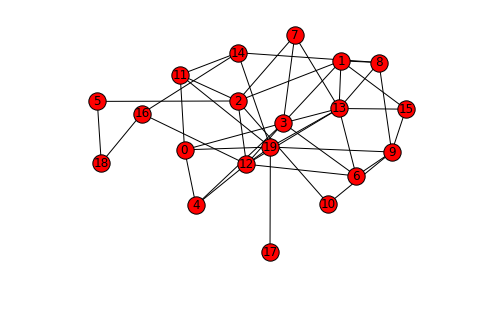

In [29]:
# Your answer here.
G = nx.erdos_renyi_graph(20,0.15,seed = s)
nx.draw(G, with_labels=True)

### Instructions (continued)
> 1.2) Compute the number of edges in the graph using one of the methods provided by NetworkX.

In [31]:
# Your answer here.
G.number_of_edges()

42

### Instructions (continued)
> 1.3) Print the corresponding neighbors for each node.

In [32]:
# Your answer here.
for node in G.nodes():
         print node, G.neighbors(node)

0 [11, 19, 3, 4]
1 [8, 2, 3, 13, 15]
2 [1, 5, 7, 10, 11, 12]
3 [0, 1, 4, 6, 7, 12, 13]
4 [0, 3, 12]
5 [2, 18]
6 [9, 3, 12, 13]
7 [2, 3, 13]
8 [1, 13, 14, 9]
9 [8, 10, 19, 6, 15]
10 [9, 2]
11 [0, 2, 19, 14]
12 [2, 3, 4, 6, 13, 16, 19]
13 [1, 3, 6, 7, 8, 12, 15, 19]
14 [8, 16, 11, 19]
15 [1, 13, 9]
16 [18, 12, 14]
17 [19]
18 [16, 5]
19 [0, 9, 11, 12, 13, 14, 17]


### Instructions (continued)
> 1.4) Find a node with the most number of neigbors. How many neighbors does it have?

> **Hint**: Review [NetworkX degree documentation](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.DiGraph.degree.html).

In [33]:
# Your answer here.
max(G.degree().values())

8

### Instructions (continued)
> 1.5) Remove the node with the most neighbors (found in exercise 1.4 above) from the graph. 

In [34]:
# Your answer here.
# Node 13 has 8 neighbors; the largest number. In the next step, remove the node 13.
G.degree()

{0: 4,
 1: 5,
 2: 6,
 3: 7,
 4: 3,
 5: 2,
 6: 4,
 7: 3,
 8: 4,
 9: 5,
 10: 2,
 11: 4,
 12: 7,
 13: 8,
 14: 4,
 15: 3,
 16: 3,
 17: 1,
 18: 2,
 19: 7}

In [35]:
#Remove node 13
G.remove_node(13)

In [36]:
#Confirm that there is no node 13 anymore.
G.degree()

{0: 4,
 1: 4,
 2: 6,
 3: 6,
 4: 3,
 5: 2,
 6: 3,
 7: 2,
 8: 3,
 9: 5,
 10: 2,
 11: 4,
 12: 6,
 14: 4,
 15: 2,
 16: 3,
 17: 1,
 18: 2,
 19: 6}

<br>
<div class="alert alert-info">
<b>Exercise 1 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

## 3. Submit your notebook

Please make sure that you:
- Perform a final "Save and Checkpoint";
- Download a copy of the notebook in ".ipynb" format to your local machine using "File", "Download as", and "IPython Notebook (.ipynb)"; and
- Submit a copy of this file to the online campus.